In [136]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [947]:
# Function to calculate the 95th percentile, average, and 5th percentile values
root_folder = "SimResults"
prefix = "20231201-023803_Gcc_mode:0_ueNum:10_coverage:1."
#prefix = "20231121-230801_TcpCopa_mode:1_ueNum:4_co"
#20230627-005036_TcpCopa_mode:0_ueNum:40
#20230627-005044_TcpCopa_mode:1_ueNum:40

#20230625-075224_TcpCopa_mode:0

#20230625-073644_TcpCopa_mode:1

#20230504-045815_TcpCopa_mode:0 (enable   R = true)
#20230504-043131_TcpCopa_mode:0
#20230504-043614_TcpCopa_mode:2
#20230504-044122_TcpCopa_mode:4
                                       
matching_dirs = []
for dirname in os.listdir(root_folder):
    if dirname.startswith(prefix):
        matching_dirs.append(root_folder +"/"+dirname)
                                      
target_dir = matching_dirs[0]

In [948]:
# Function to calculate the 95th percentile, average, and 5th percentile values

lower = 0.05
upper = 0.95

def analyze_dataframe(df):
    # Select only numeric columns for analysis# Convert all string columns to numeric columns
    #df = df.apply(pd.to_numeric, errors='coerce')
    df = df.apply(pd.to_numeric, errors='coerce')
    # Filter out rows with any negative values
    #df = df[(df >= 0).all(axis=1)]
    #df = df[df['E2E'] > 0]
    quantiles = df.quantile([lower, 0.5, upper])
    avg = df.mean()
    std = df.std()
    result = pd.concat([quantiles.loc[lower], avg, quantiles.loc[upper], std], axis=1)
    result.columns = ["5th", "Average", "95th", "Std"]
    
    return result

# Read all existing bullet_latencyN.csv files
files = glob.glob(target_dir +"/"+ "bullet_latency*.csv")
combined_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, sep='\t')  # Specify the delimiter as '\t'
    df = df[(df >= 0).all(axis=1)]
    result = analyze_dataframe(df)
    print(file, ' Average E2E', round(result.loc['E2E']['Average'],3))
    combined_df = pd.concat([combined_df, df])

# Analyze the combined dataframe
result = analyze_dataframe(combined_df)
print(result)
bitrate = round(result["Average"]["Frame Size"]*30*8/(1024*1024), 2)
lower_bitrate= round(result["5th"]["Frame Size"]*30*8/(1024*1024), 2)
print('Bitrate:',bitrate, 'Mbps', bitrate -lower_bitrate)
link_throughput = (result['Average']['Frame Size']*8/(1024*1024))/(result['Average']['Net'] + result['Average']['Link'] + result['Average']['Air'])
print('Total link throughput: ', round(link_throughput, 3), 'Mbps')

SimResults/20231201-023803_Gcc_mode:0_ueNum:10_coverage:1.000000_ueInterval:0.10_ueSpeed:0.00_enableBbr:0_beta:0.010000_fairness:1.00_copaDelta:0.10_bw: 100.00/bullet_latency3.csv  Average E2E nan
SimResults/20231201-023803_Gcc_mode:0_ueNum:10_coverage:1.000000_ueInterval:0.10_ueSpeed:0.00_enableBbr:0_beta:0.010000_fairness:1.00_copaDelta:0.10_bw: 100.00/bullet_latency2.csv  Average E2E nan
SimResults/20231201-023803_Gcc_mode:0_ueNum:10_coverage:1.000000_ueInterval:0.10_ueSpeed:0.00_enableBbr:0_beta:0.010000_fairness:1.00_copaDelta:0.10_bw: 100.00/bullet_latency4.csv  Average E2E nan
SimResults/20231201-023803_Gcc_mode:0_ueNum:10_coverage:1.000000_ueInterval:0.10_ueSpeed:0.00_enableBbr:0_beta:0.010000_fairness:1.00_copaDelta:0.10_bw: 100.00/bullet_latency8.csv  Average E2E nan
SimResults/20231201-023803_Gcc_mode:0_ueNum:10_coverage:1.000000_ueInterval:0.10_ueSpeed:0.00_enableBbr:0_beta:0.010000_fairness:1.00_copaDelta:0.10_bw: 100.00/bullet_latency1.csv  Average E2E nan
SimResults/2023

In [949]:
(result['Average']['Frame Size']*8/(1024*1024))/(result['Average']['Net'] + result['Average']['Link'] + result['Average']['Air'])

nan

Time: Mean = 23.02, Standard Deviation = 13.09, 95th Percentile = 45.24, 5th Percentile = 0.99
Alloc RB: Mean = 262.28, Standard Deviation = 27.82, 95th Percentile = 266.00, 5th Percentile = 78.00
 Proactive RB: Mean = 0.00, Standard Deviation = 0.03, 95th Percentile = 0.00, 5th Percentile = 0.00
Used RB: Mean = 245.18, Standard Deviation = 46.67, 95th Percentile = 266.00, 5th Percentile = 2.00
Unused RB: Mean = 17.10, Standard Deviation = 37.66, 95th Percentile = 185.00, 5th Percentile = 0.00
Required RB: Mean = 2084.90, Standard Deviation = 3982.00, 95th Percentile = 20550.16, 5th Percentile = 91.83
Wasted RB (P): Mean = 16.53, Standard Deviation = 36.24, 95th Percentile = 173.00, 5th Percentile = 0.00
Wasted RB (R): Mean = 3.30, Standard Deviation = 26.00, 95th Percentile = 155.17, 5th Percentile = 0.00
Wasted TBS: Mean = 1497.27, Standard Deviation = 3188.97, 95th Percentile = 14602.00, 5th Percentile = 0.00
Total SE: Mean = 93.22, Standard Deviation = 15.37, 95th Percentile = 98.0

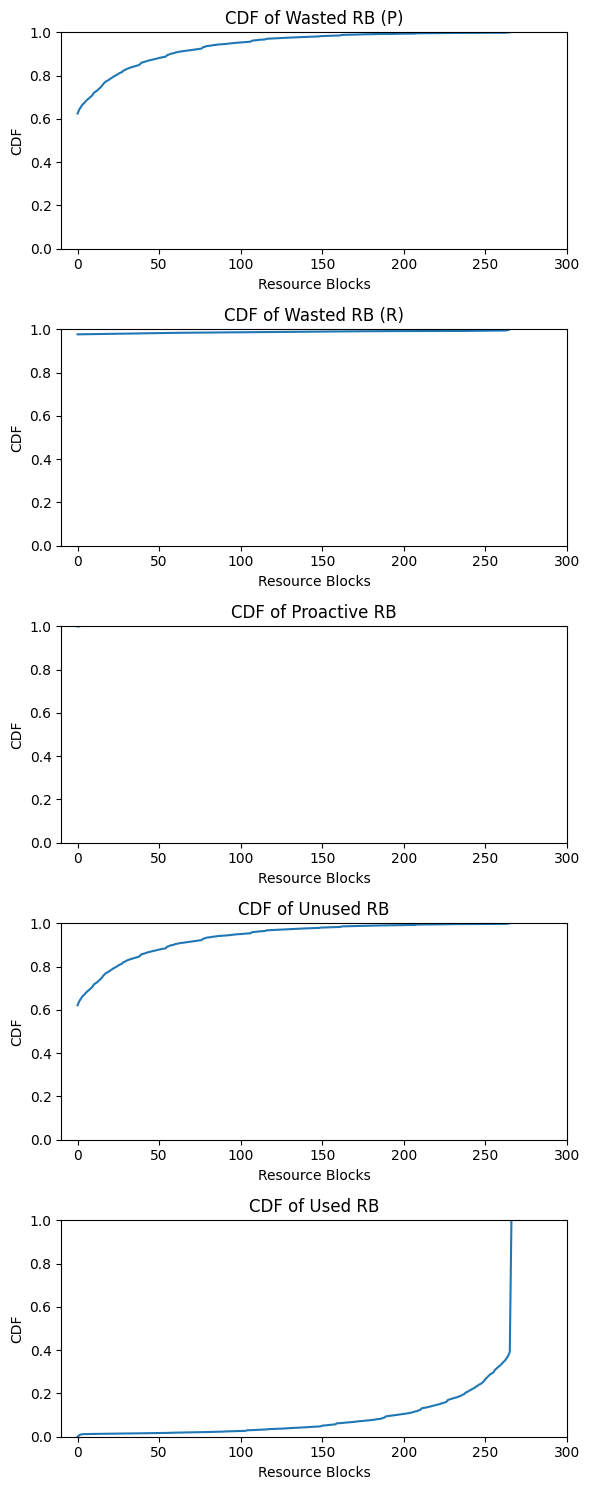

In [950]:
### Read the CSV file
file = "gnb_resource.csv"
df = pd.read_csv(target_dir +"/"+ file, sep="\t")

# Calculate the CDFs
used_rb_cdf = np.cumsum(df["Used RB"].value_counts().sort_index()) / len(df)
wasted_rb_p_cdf = np.cumsum(df["Wasted RB (P)"].value_counts().sort_index()) / len(df)
wasted_rb_r_cdf = np.cumsum(df["Wasted RB (R)"].value_counts().sort_index()) / len(df)
proactive_rb_cdf = np.cumsum(df[" Proactive RB"].value_counts().sort_index()) / len(df)
unused_rb_cdf = np.cumsum(df["Unused RB"].value_counts().sort_index()) / len(df)
required_rb_cdf = np.cumsum(df["Required RB"].value_counts().sort_index()) / len(df)

# Plot the CDFs
fig, axs = plt.subplots(5, figsize=(6, 15))

x_lim = (-10,300)
y_lim = (0, 1)

used = 0
underutilized = 0
wasted = 0
th = 0

for col in df.columns:
    if col == 'Effective TBS':
        target_df = df[col][df[col] > 0] 
    else:
        target_df = df[col]
        
    mean = target_df.mean()
    std = target_df.std()
    percentile_95 = target_df.quantile(0.99)
    percentile_5 = target_df.quantile(0.01)
    
    if col == 'Used RB':
        used = mean
    if col == 'Wasted RB (R)':
        underutilized = mean
    if col == 'Wasted RB (P)':
        wasted = mean
    if col == 'Effective TBS':
        th = mean*400*8/(1024*1024)
    
    print(f"{col}: Mean = {mean:.2f}, Standard Deviation = {std:.2f}, 95th Percentile = {percentile_95:.2f}, 5th Percentile = {percentile_5:.2f}")

total = used + underutilized + wasted
    
print(used/total)
print(underutilized/total)
print(wasted/total)
print(th)

    
for ax in axs:
    ax.set_ylim(y_lim)
    ax.set_xlim(x_lim)

axs[0].plot(wasted_rb_p_cdf.index, wasted_rb_p_cdf.values)
axs[0].set_title("CDF of Wasted RB (P)")
axs[0].set_xlabel("Resource Blocks")
axs[0].set_ylabel("CDF")

axs[1].plot(wasted_rb_r_cdf.index, wasted_rb_r_cdf.values)
axs[1].set_title("CDF of Wasted RB (R)")
axs[1].set_xlabel("Resource Blocks")
axs[1].set_ylabel("CDF")

axs[2].plot(proactive_rb_cdf.index, proactive_rb_cdf.values)
axs[2].set_title("CDF of Proactive RB")
axs[2].set_xlabel("Resource Blocks")
axs[2].set_ylabel("CDF")

axs[3].plot(unused_rb_cdf.index, unused_rb_cdf.values)
axs[3].set_title("CDF of Unused RB")
axs[3].set_xlabel("Resource Blocks")
axs[3].set_ylabel("CDF")

axs[4].plot(used_rb_cdf.index, used_rb_cdf.values)
axs[4].set_title("CDF of Used RB")
axs[4].set_xlabel("Resource Blocks")
axs[4].set_ylabel("CDF")

fig.tight_layout()
plt.show()

In [902]:
effective_tbs_cdf = np.cumsum(df["Effective TBS"].value_counts().sort_index()) / len(df)
df.to_csv('./PaperStatistics/RobustResourceAllocation/non_congested_effective_tbs_cdf_0.csv', index = False)

In [648]:
effective_tbs_cdf0 = np.load('./PaperStatistics/RobustResourceAllocation/effective_tbs_cdf_0.npy')
effective_tbs_cdf2 = np.load('./PaperStatistics/RobustResourceAllocation/effective_tbs_cdf_2.npy')
effective_tbs_cdf3 = np.load('./PaperStatistics/RobustResourceAllocation/effective_tbs_cdf_3.npy')

In [159]:
import pandas as pd

# load the csv file
files = glob.glob(target_dir +"/"+ "bullet_rtt[0-9].csv")
combined_df = pd.DataFrame()

# compute the average and standard deviation of the "New" columnfor file in files:
for file in files:
    df = pd.read_csv(file, sep='\t')  # Specify the delimiter as '\t'
    #df = df[(df >= 0).all(axis=1)]
    new_avg = df['New'].mean()
    new_std = df['New'].std()

print(f"New column average: {new_avg:.6f}")
print(f"New column standard deviation: {new_std:.6f}")

New column average: 0.028751
New column standard deviation: 0.006046


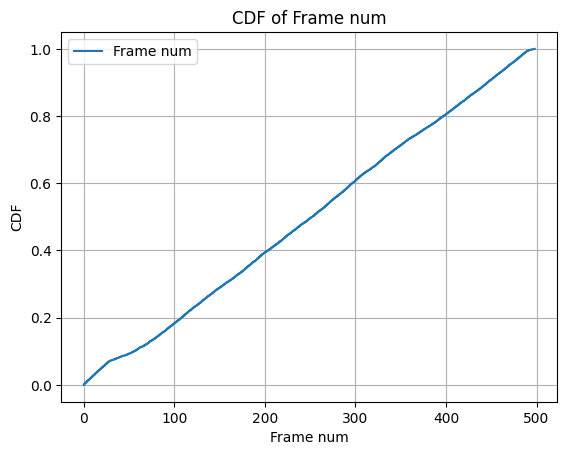

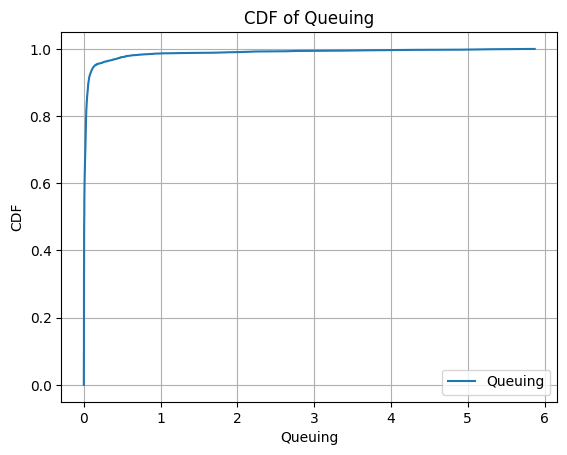

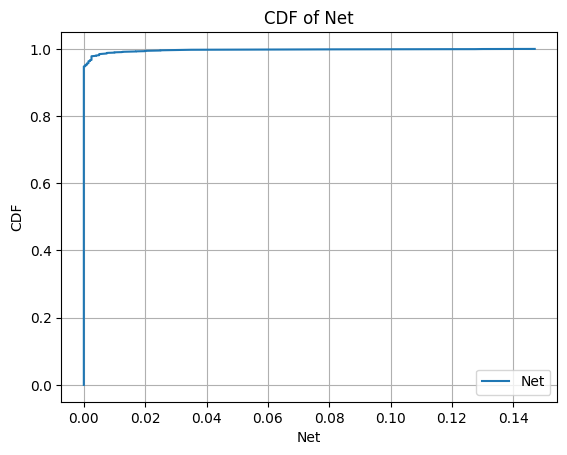

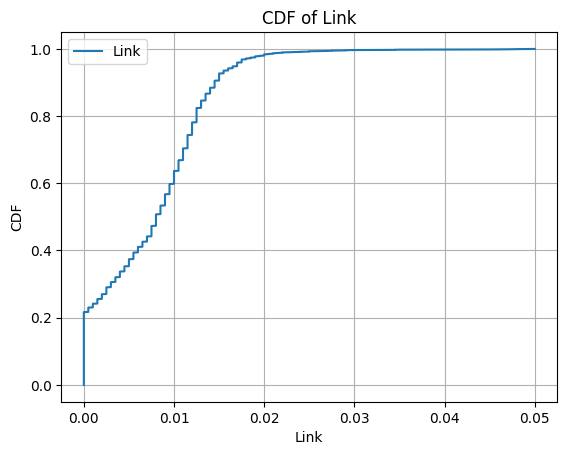

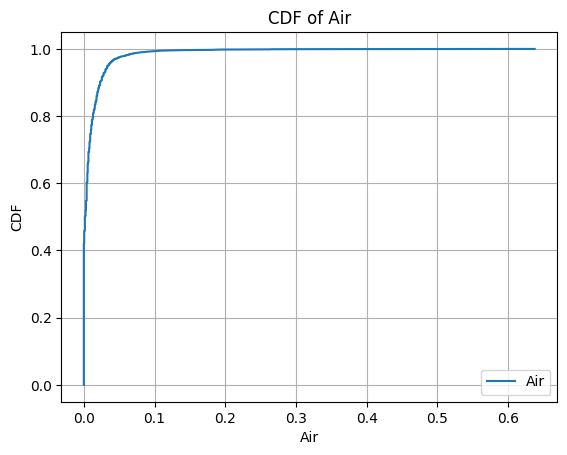

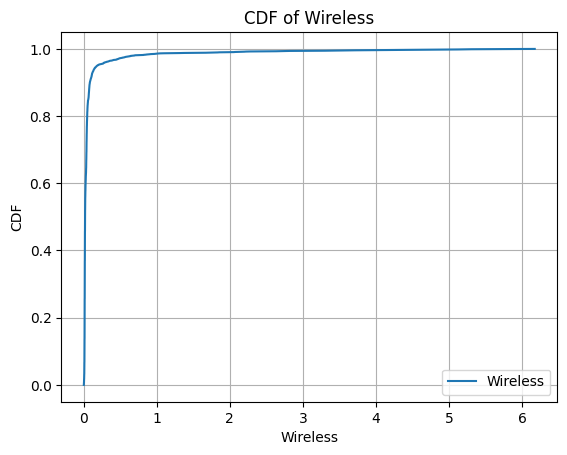

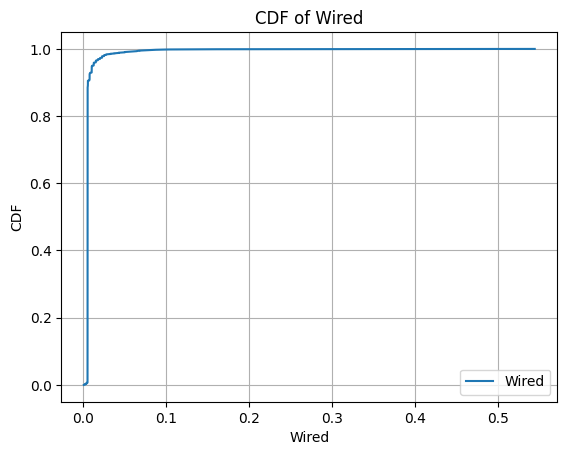

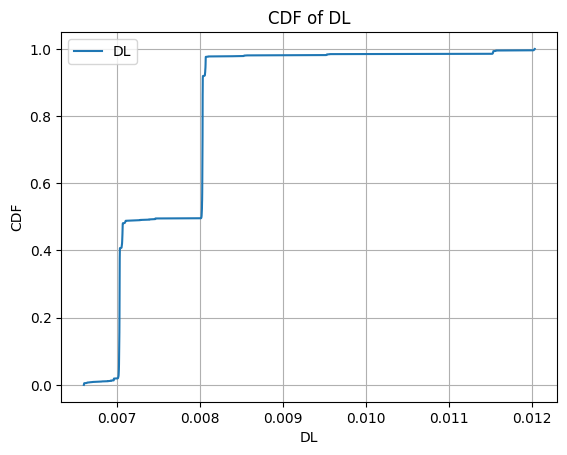

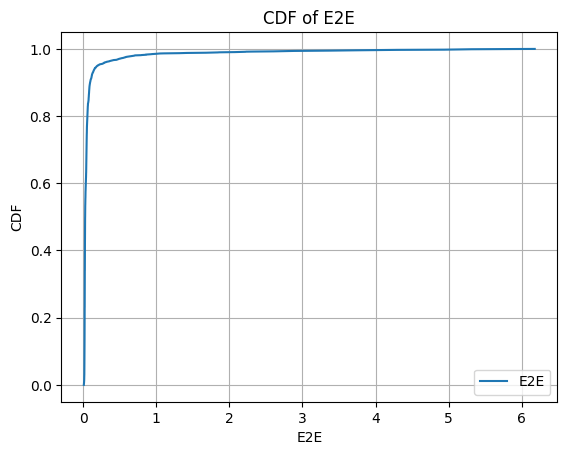

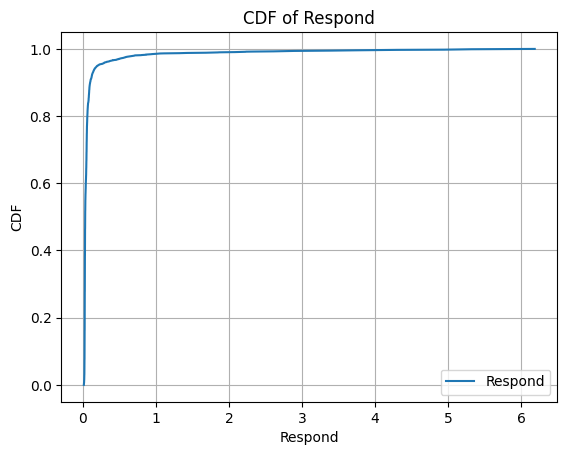

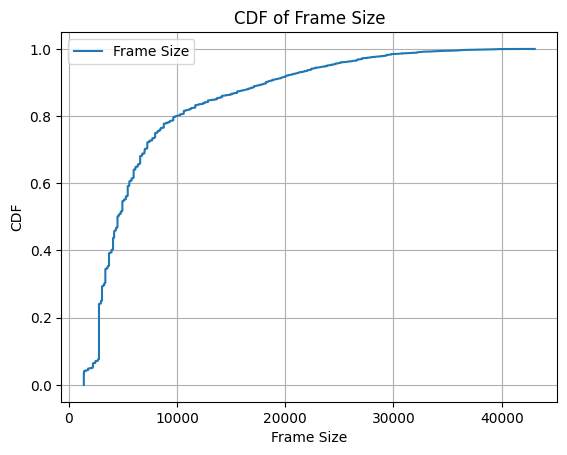

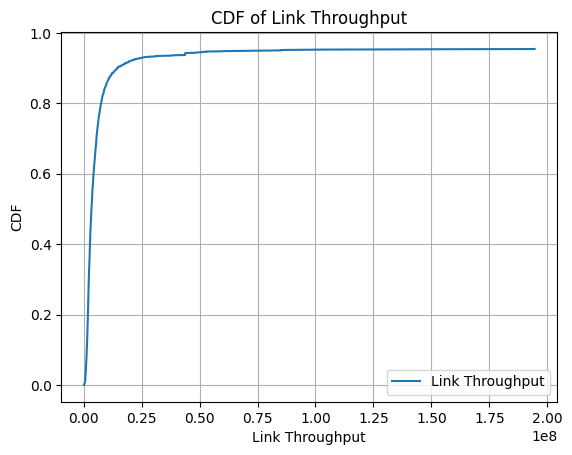

In [312]:
import matplotlib.pyplot as plt

def plot_cdf(df):
    for column in df.columns:
        sorted_data = df[column].sort_values()
        yvals = np.arange(len(sorted_data))/float(len(sorted_data))
        plt.figure()
        plt.plot(sorted_data, yvals, label=column)
        plt.xlabel(column)
        plt.ylabel('CDF')
        plt.title(f'CDF of {column}')
        plt.legend()
        plt.grid()
        plt.show()

plot_cdf(combined_df)

In [157]:
from scipy.stats import expon

def exponential_cdf(x, scale):
    return expon.cdf(x, scale=scale)

# Assuming scale = 0.5 and x = 2.0
scale = 0.0055
x = 0.01

# Compute the CDF of the exponential distribution
cdf = exponential_cdf(x, scale)

print("CDF:", cdf)

CDF: 0.8376793888181518


In [364]:
import numpy as np

def laplace_cdf(x, mu, b):
    z = (x - mu) / b
    if z < 0:
        return 0.5 * np.exp(z)
    else:
        return 1 - 0.5 * np.exp(-z)

In [ ]:
x = 

cdf = laplace_cdf(x, mu, b)

print(f"CDF at {x} is {cdf}")